In [4]:
from polytrope_model import *
from scipy.stats import norm


In [1]:
def monte_carlo(M, dM, R, dR, L, dL, Z_X, dZ_X, Y, dY, r_n, d_c, tau, tau_t, N, L_sol,a,b):
    nn = np.zeros(N)
    Mm = M + dM*np.random.normal(0, 1, N)
    Rr = R + dR*np.random.normal(0, 1, N)
    Ll = L + dL*np.random.normal(0, 1, N)
    Z_Xx = Z_X + dZ_X*np.random.normal(0, 1, N)
    Yy = Y + dY*np.random.normal(0, 1, N)
    for i in range(N):
        print(f"Iteration {i + 1}/{N}")
        try:
            # Attempt to calculate the polytropic index with the current parameters
            nn[i] = index(y, a, b, Mm[i], Ll[i], Yy[i], Z_Xx[i], Rr[i], r_n, d_c, tau, tau_t, L_sol)
        except ValueError as e:
            # If there's a ValueError, skip this iteration and print a message
            print(f"Warning: Skipping iteration {i + 1} due to error: {e}")
            #nn[i] = np.nan  # Optionally, set this entry to NaN or some other marker
    return nn

In [2]:
#Sol
M_sol = 1.988475e33
L_sol = 3.828e33
R_sol = 6.957e10
Z_sol = 0.02857
Y_sol = 0.28

#%%
# Epsilon Eridani
M_e = 0.82 * M_sol
dM_e = 0.02 * M_sol
R_e = 0.738 * R_sol
dR_e= 0.0003 * R_sol
L_e = 0.32 * L_sol
dL_e = 0.01 * L_sol
metal_e = -0.08
dmetal_e = 0.01
Z_e = Z_sol*10**metal_e
Y_e = 0.2423
dY_e = 0.0054
total_time_e = 2*4.6*M_e*(1/L_e)


# Theta Persei
M_t = 1.138 * M_sol
dM_t = 0.010 * M_sol
R_t = 1.319 * R_sol
dR_t = 0.011 * R_sol
L_t = 2.235 * L_sol
dL_t = 0.040 * L_sol
metal_t = -0.03
dmetal_t = 0.09
Z_t = Z_e = Z_sol*10**metal_t
Y_t = 0.2423
dY_t = 0.0054
total_time_t = 2*4.6*M_e*(1/L_t)

/Users/rodrigocastro/Desktop/Computational_Astronomy/polytrope_model.py:37: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(lane_emden_sys, lane_em_0, xi_range, args=(n,), tfirst=True)


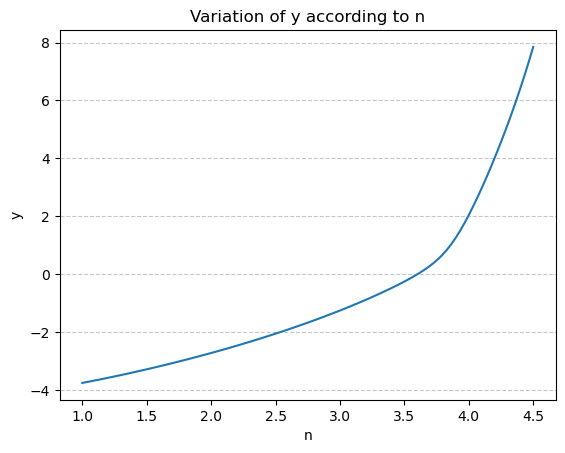

In [4]:
valores_t = np.linspace(1, 4.5, 100)
Xs = (1-Y_t)/(1+Z_t)
Z = 1-Y_t-Xs
yy_t = [y(i, Xs, 0.2, 0.03, R_t, total_time_t/2, total_time_t, M_t, Z, L_sol, L_t) for i in valores_t]
plt.plot(valores_t, yy_t)
plt.xlabel('n')
plt.ylabel('y')
plt.title('Variation of y according to n')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [5]:
poly_index_t = index(y, 2.5, 4.5, M_t, L_t, Y_t, Z_t, R_t, L_sol, 0.2, 0.03, total_time_t/3, total_time_t)
poly_index_t

3.606496714632158

In [6]:
Xs = (1-Y_sol)/(1+Z_sol)
Z = 1-Y_sol-Xs
xi, y1, y2 = lane_emden_solver(poly_index_t)
X = chemical_composition(xi, Xs, 0.2, 0.03, total_time_t/3, total_time_t)
nn_t = monte_carlo(M_t, dM_t, R_t, dR_t, L_t, dL_t,  Z_t, dmetal_t, Y_t, dY_t, 0.2, 0.03, total_time_t/2, total_time_t, 3000, L_sol, a=1, b=3.9)

Iteration 1/3000
Iteration 2/3000
Iteration 3/3000
Iteration 4/3000
Iteration 5/3000
Iteration 6/3000
Iteration 7/3000
Iteration 8/3000
Iteration 9/3000
Iteration 10/3000
Iteration 11/3000
Iteration 12/3000
Iteration 13/3000
Iteration 14/3000
Iteration 15/3000
Iteration 16/3000
Iteration 17/3000
Iteration 18/3000
Iteration 19/3000
Iteration 20/3000
Iteration 21/3000
Iteration 22/3000
Iteration 23/3000
Iteration 24/3000
Iteration 25/3000
Iteration 26/3000
Iteration 27/3000
Iteration 28/3000
Iteration 29/3000
Iteration 30/3000
Iteration 31/3000
Iteration 32/3000
Iteration 33/3000
Iteration 34/3000
Iteration 35/3000
Iteration 36/3000
Iteration 37/3000
Iteration 38/3000
Iteration 39/3000
Iteration 40/3000
Iteration 41/3000
Iteration 42/3000
Iteration 43/3000
Iteration 44/3000
Iteration 45/3000
Iteration 46/3000
Iteration 47/3000
Iteration 48/3000
Iteration 49/3000
Iteration 50/3000
Iteration 51/3000
Iteration 52/3000
Iteration 53/3000
Iteration 54/3000
Iteration 55/3000
Iteration 56/3000
I

In [7]:
def plot_histogram(nn, bins):
    plt.hist(nn, bins=bins, color='blue', edgecolor='black')
    plt.xlabel('n')
    plt.ylabel('N(n)')
    plt.title('Monte Carlo Simulation Results for Index')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [8]:
std_t = np.std(nn_t)
mean_t = np.mean(nn_t)

In [9]:
std_t

0.02936181505404471

In [10]:
mean_t

3.6111316155294357

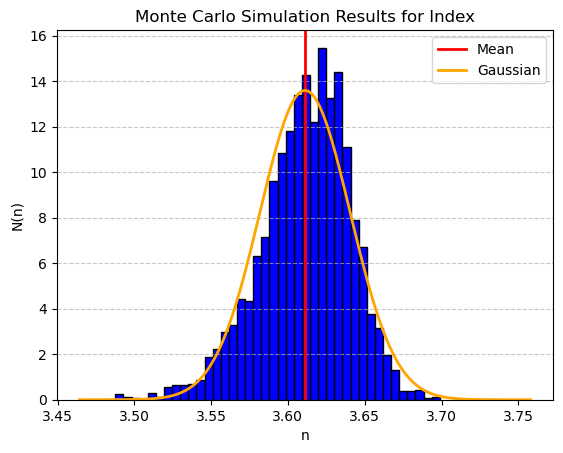

In [11]:
# Gaussian
# Generate x values for the curve
x_gauss = np.linspace(mean_t - 5*std_t, mean_t + 5*std_t, 3000)
# Calculate the PDF of the normal distribution
y_gauss = norm.pdf(x_gauss, mean_t, std_t)

# Plots
# Mean vertical line
plt.axvline(x=mean_t, color='red', linewidth=2, label='Mean')

# Gaussian
plt.plot(x_gauss, y_gauss, color='orange', linewidth=2, label='Gaussian')

# Histogram
plt.hist(nn_t, 40, color='blue', edgecolor='black', density=True)

plt.xlabel('n')
plt.ylabel('N(n)')
plt.title('Monte Carlo Simulation Results for Index')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [12]:
def monte_carlo_plots(mean, std, N, nn): 
     # Gaussian
    # Generate x values for the curve
    x_gauss = np.linspace(mean - 5*std, mean + 5*std, N)
    # Calculate the PDF of the normal distribution
    y_gauss = norm.pdf(x_gauss, mean, std)

    # Plots
    # Mean vertical line
    plt.axvline(x=mean, color='red', linewidth=2, label='Mean')

    # Gaussian
    plt.plot(x_gauss, y_gauss, color='orange', linewidth=2, label='Gaussian')

    # Histogram
    plt.hist(nn, 40, color='blue', edgecolor='black', density=True)

    plt.xlabel('n')
    plt.ylabel('N(n)')
    plt.title('Monte Carlo Simulation Results for Index')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

In [6]:
# Indexes
poly_index_t = index(y, 2.5, 4.5, M_t, L_t, Y_t, Z_t, R_t, L_sol, 0.2, 0.03, total_time_t/3, total_time_t)
poly_index_e = index(y, 1.2, 4.5, M_e, L_e, Y_e, Z_e, R_e, L_sol, 0.2, 0.03, total_time_e/2, total_time_e)
poly_index_sun = index(y, 1, 4, M_sol, L_sol, Y_sol, Z_sol, R_sol,  L_sol, 0.2, 0.03, 1, 2)

# Theta
Xs_t = (1-Y_t)/(1+Z_t)
Z = 1-Y_t-Xs_t
x_t, y, z = lane_emden_solver(poly_index_t)
X_t = chemical_composition(x_t, Xs_t, 0.2, 0.03, total_time_t/2, total_time_t)

# Epsilon
Xs_e = (1-Y_e)/(1+Z_e)
Z = 1-Y_e-Xs_e
x_e, y, z = lane_emden_solver(poly_index_e)
X_e = chemical_composition(x_e, Xs_e, 0.2, 0.03, total_time_e/2, total_time_e)

# Sun
Xs_sun = (1-Y_sol)/(1+Z_sol)
Z = 1-Y_sol-Xs_sun
x_sol, y, z = lane_emden_solver(poly_index_sun)
X_sun = chemical_composition(x_sol, Xs_sun, 0.2, 0.03, 1, 2)



/Users/rodrigocastro/Desktop/Computational_Astronomy/polytrope_model.py:37: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(lane_emden_sys, lane_em_0, xi_range, args=(n,), tfirst=True)


In [8]:
def mass(n, M):
    xi, y1, y2 = lane_emden_solver(n)
    # Compute m(xi) using the formula m(xi) = M * (xi^2 * theta_prime) / (xi_surface^2 * theta_prime_surface)
    mass_xi = M * (xi**2 * y2) / (xi[-1]**2 * y2[-1])
    return mass_xi

In [34]:
# Thermodynamic
rho_sun, P_sun, T_sun = rho_P_T(poly_index_sun, R_sol, M_sol, X_sun, Z_sol)
rho_e, P_e, T_e = rho_P_T(poly_index_e, R_e, M_e, X_e, Z_e)
rho_t, P_t, T_t = rho_P_T(poly_index_t, R_t, M_t, X_t, Z_t)


rho_sun_c, P_sun_c, T_sun_c = rho_P_T_central(poly_index_sun, R_sol, M_sol, X_sun, Z_sol)
rho_e_c, P_e_c, T_e_c = rho_P_T_central(poly_index_e, R_e, M_e, X_e, Z_e)
rho_t_c, P_t_c, T_t_c = rho_P_T_central(poly_index_t, R_t, M_t, X_t, Z_t)

# Luminosity
lum_sun = luminosity(poly_index_sun, Xs_sun, 0.2, 0.03, R_sol, 1, 2,  M_sol, Z_sol, L_sol )
lum_e = luminosity(poly_index_e, Xs_e, 0.2, 0.03, R_e, total_time_e/3, total_time_e, M_e, Z_e, L_sol )
lum_t = luminosity(poly_index_t, Xs_t, 0.2, 0.03, R_t, total_time_t/2, total_time_t, M_t, Z_t, L_sol )

# Mass
mass_e = mass(poly_index_e, M_e)
mass_t = mass(poly_index_t, M_t)
mass_sun = mass(poly_index_sun, M_sol)


# Emissivity
e_t, epp_t, ecno_t = emissivity(rho_t, T_t, X_t, Z_t)
e_e, epp_e, ecno_e = emissivity(rho_e, T_e, X_e, Z_e)
e_sun, epp_sun, ecno_sun = emissivity(rho_sun, T_sun, X_sun, Z_sol)

def mass_lum_plots(mass_e, mass_t, mass_sun, lum_sun, lum_e, lum_t):
    
    # Normalize Mass (using your specified normalization formula)
    mass_sun_normalized = (mass_sun - np.min(mass_sun)) / (np.max(mass_sun) - np.min(mass_sun))
    mass_e_normalized = (mass_e - np.min(mass_e)) / (np.max(mass_e) - np.min(mass_e))
    mass_t_normalized = (mass_t - np.min(mass_t)) / (np.max(mass_t) - np.min(mass_t))

    # Normalize Luminosity (using your specified normalization formula)
    lum_sun_normalized = (lum_sun - np.min(lum_sun)) / (np.max(lum_sun) - np.min(lum_sun))
    lum_e_normalized = (lum_e - np.min(lum_e)) / (np.max(lum_e) - np.min(lum_e))
    lum_t_normalized = (lum_t - np.min(lum_t)) / (np.max(lum_t) - np.min(lum_t))
    
    # Plot
    plt.title(r'Luminosity as a function of Mass')
    plt.plot(mass_sun_normalized, lum_sun_normalized, color='red', linestyle='--', label='Sun')
    plt.plot(mass_e_normalized, lum_e_normalized, color = 'orange', linestyle='--',label='Epsilon Eridani')
    plt.plot(mass_t_normalized, lum_t_normalized, color = 'blue', linestyle='--',label=r'$\theta$ Persei A')
    plt.ylabel(r'Lr/L')
    plt.xlabel(r'm/M')
    plt.legend()
    plt.show()

def emissivity_plots(xi_sol, xi_e, xi_t, e_t, epp_t, ecno_t, e_e, epp_e, ecno_e, e_sun, epp_sun, ecno_sun):
    xi_sol_normalized = (xi_sol - np.min(xi_sol)) / (np.max(xi_sol) - np.min(xi_sol))
    xi_e_normalized = (xi_e - np.min(xi_e)) / (np.max(xi_e) - np.min(xi_e))
    xi_t_normalized = (xi_t - np.min(xi_t)) / (np.max(xi_t) - np.min(xi_t))

    plt.title(r'Emissivity as a function of $\xi$')
    plt.plot(xi_sol_normalized, e_sun, color='red', linestyle='--', label='Sun')
    plt.plot(xi_e_normalized, e_e, color = 'orange', linestyle='--',label='Epsilon Eridani')
    plt.plot(xi_t_normalized, e_t, color = 'blue', linestyle='--',label=r'$\theta$ Persei A')
    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$\epsilon (erg/g/s$')
    plt.legend()
    plt.show()

    plt.title(r'Emissivity by CNO cycle as a function of $\xi$')
    plt.plot(xi_sol_normalized, ecno_sun, color='red', linestyle='--', label='Sun')
    plt.plot(xi_e_normalized, ecno_e, color = 'orange', linestyle='--',label='Epsilon Eridani')
    plt.plot(xi_t_normalized, ecno_t, color = 'blue', linestyle='--',label=r'$\theta$ Persei A')
    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$\epsilon_{cno} (erg/g/s$')
    plt.legend()
    plt.show()

    plt.title(r'Emissivty by PP chains as a function of $\xi$')
    plt.plot(xi_sol_normalized, epp_sun, color='red', linestyle='--', label='Sun')
    plt.plot(xi_e_normalized, epp_e, color = 'orange', linestyle='--',label='Epsilon Eridani')
    plt.plot(xi_t_normalized, epp_t, color = 'blue', linestyle='--',label=r'$\theta$ Persei A')
    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$\epsilon_{pp}  (erg/g/s$')
    plt.legend()
    plt.show()
    
def thermo_plots(xi_sol, xi_e, xi_t,  rho_sun, rho_e, rho_t, P_sun, P_e, P_t, T_sun, T_e, T_t):
    # Normalize xi values to range between 0 and 1
    xi_sol_normalized = (xi_sol - np.min(xi_sol)) / (np.max(xi_sol) - np.min(xi_sol))
    xi_e_normalized = (xi_e - np.min(xi_e)) / (np.max(xi_e) - np.min(xi_e))
    xi_t_normalized = (xi_t - np.min(xi_t)) / (np.max(xi_t) - np.min(xi_t))

    plt.title(r'Density as a function of $\xi$')
    plt.plot(xi_sol_normalized, rho_sun, color='red', linestyle='--', label='Sun')
    plt.plot(xi_e_normalized, rho_e, color = 'orange', linestyle='--',label='Epsilon Eridani')
    plt.plot(xi_t_normalized, rho_t, color = 'blue', linestyle='--',label=r'$\theta$ Persei A')
    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$\rho (g/cm^3)$')
    plt.legend()
    plt.show()

    plt.title(r'Temperature as a function of $\xi$')
    plt.plot(xi_sol_normalized, T_sun, color='red', linestyle='--', label='Sun')
    plt.plot(xi_e_normalized, T_e, color = 'orange', linestyle='--',label='Epsilon Eridani')
    plt.plot(xi_t_normalized, T_t, color = 'blue', linestyle='--',label=r'$\theta$ Persei A')
    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$T (K)$')
    plt.legend()
    plt.show()

    plt.title(r'Pressure as a function of $\xi$')
    plt.plot(xi_sol_normalized, P_sun, color='red', linestyle='--', label='Sun')
    plt.plot(xi_e_normalized, P_e, color = 'orange', linestyle='--',label='Epsilon Eridani')
    plt.plot(xi_t_normalized, P_t, color = 'blue', linestyle='--',label=r'$\theta$ Persei A')
    plt.xlabel(r'$\xi$')
    plt.ylabel(r'$P (Ba)$')
    plt.legend()
    plt.show()

/Users/rodrigocastro/Desktop/Computational_Astronomy/polytrope_model.py:37: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(lane_emden_sys, lane_em_0, xi_range, args=(n,), tfirst=True)


In [10]:
rho_t_c

138.55239739732716

In [11]:
P_t_c

2.7445207537521482e+17

In [17]:
T_t_c[-1]

14301341.932638682

In [18]:
T_e_c[-1]

11196966.839640692

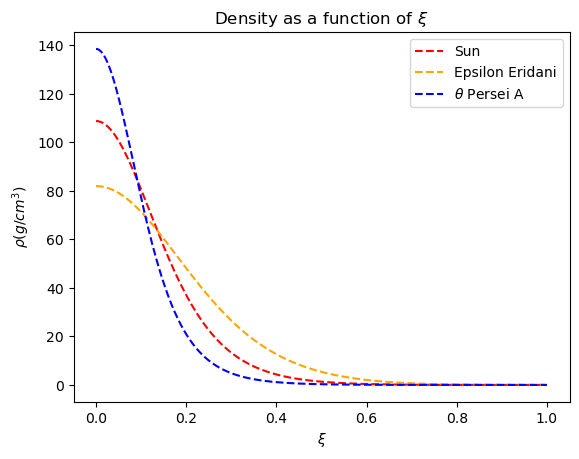

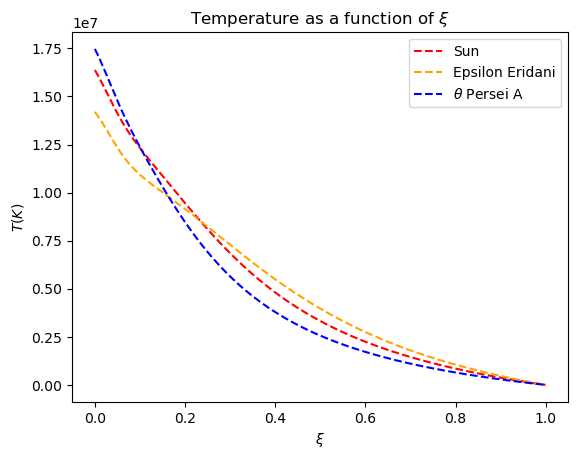

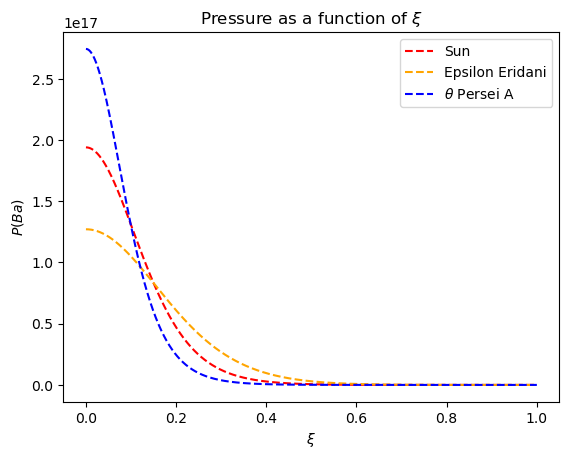

In [15]:
thermo_plots(x_sol, x_e, x_t, rho_sun, rho_e, rho_t, P_sun, P_e, P_t, T_sun, T_e, T_t)

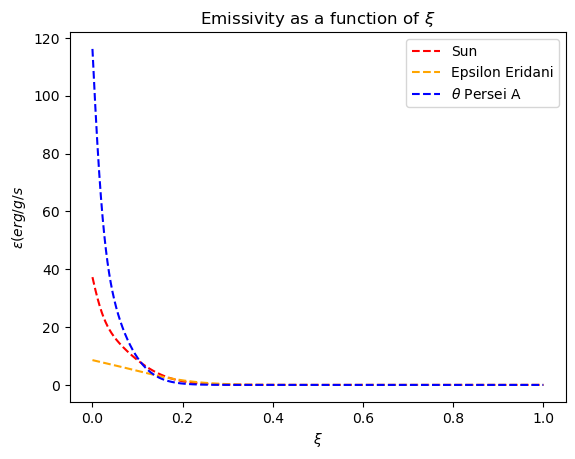

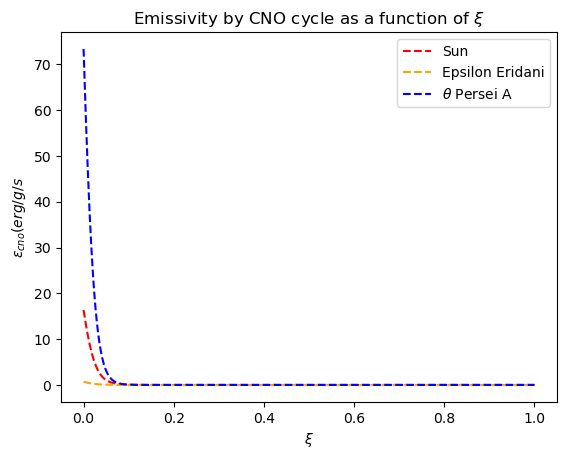

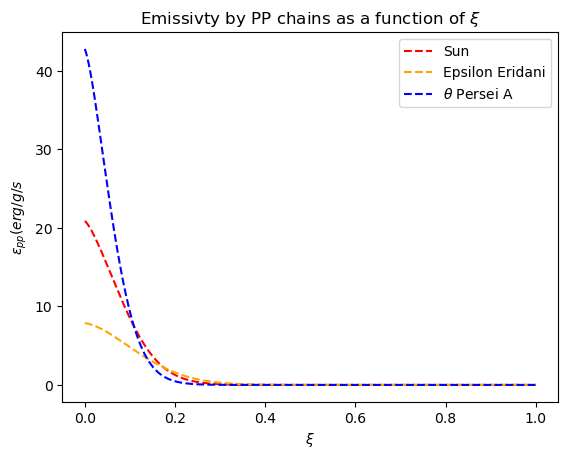

In [16]:
emissivity_plots(x_sol, x_e, x_t, e_t, epp_t, ecno_t, e_e, epp_e, ecno_e, e_sun, epp_sun, ecno_sun)

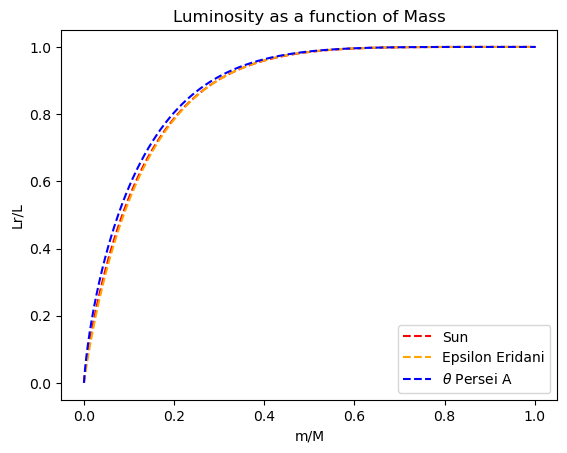

In [35]:
mass_lum_plots(mass_e, mass_t, mass_sun, lum_sun, lum_e, lum_t)